In [291]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from scipy import stats

In [292]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [293]:
data = pd.read_csv('heartattack.csv')

In [294]:
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [295]:
len(data.index)

1319

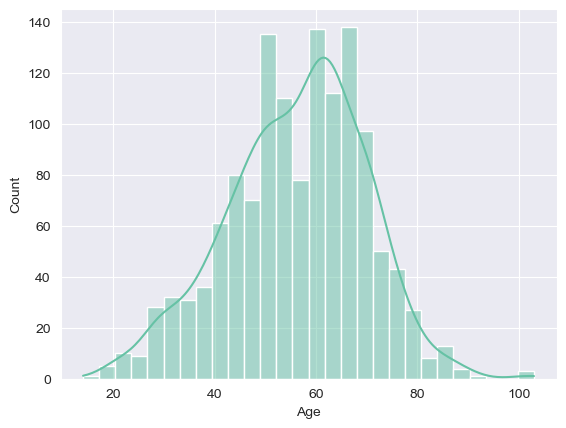

In [296]:
sns.histplot(x=data['Age'], kde=True)
plt.show()

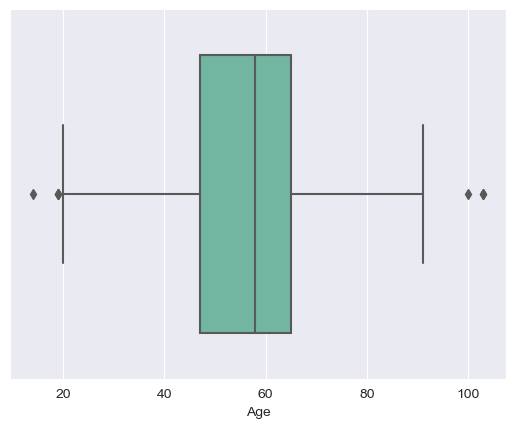

In [297]:
sns.boxplot(data=data, x='Age', width=0.75)
plt.show()

In [298]:
# check how many people are 100 and over
len(data[data['Age']>=100])

3

In [299]:
# check how many people are under 20
len(data[data['Age']<20])

4

### Explore how age is correlated to heart-attack

In [300]:
df = data.copy()

In [301]:
df['Result'] = LabelEncoder().fit_transform(df['Result'])

In [302]:
x_train, x_test, y_train, y_test = ttsplit(df['Age'], df['Result'], test_size=0.2, random_state=23)

In [303]:
regr = linear_model.LogisticRegression()

In [304]:
lm = regr.fit(x_train.values.reshape((-1,1)), y_train.values.reshape((-1)))

In [305]:
y_pred = lm.predict(x_test.values.reshape((-1,1)))

In [306]:
y_pred = y_pred.reshape(-1)

In [307]:
residuals = y_test.values-y_pred

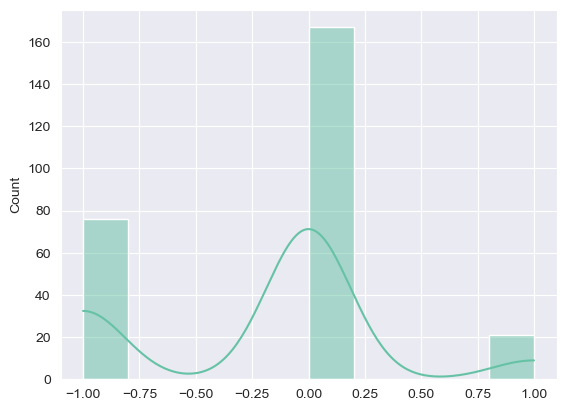

In [308]:
sns.histplot(kde=True, x=residuals)
plt.show()

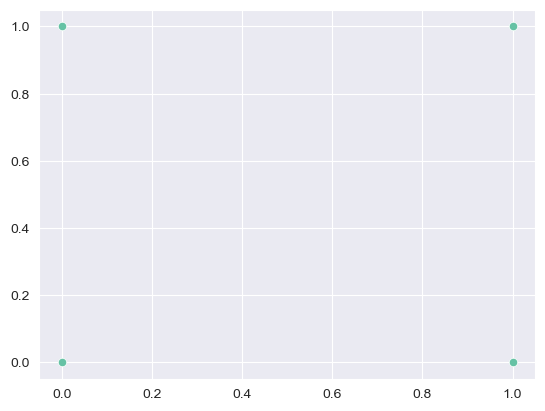

In [309]:
sns.scatterplot(x=y_test.values, y=y_pred)
plt.show()

In [310]:
df[['Age', 'Result']].corr()

,Age,Result
Age,1.000000,0.238097
Result,0.238097,1.000000


#### Age doesn't seem to be the major contributor for heart-attack.
Because for several cases where the result should have been `0`, based on `Age` the result came out to be `1`.

### Explore how gender is related to heart-attack

In [311]:
attack_summary_by_gender = df.groupby(by=['Gender'], as_index=False)['Result'].count()

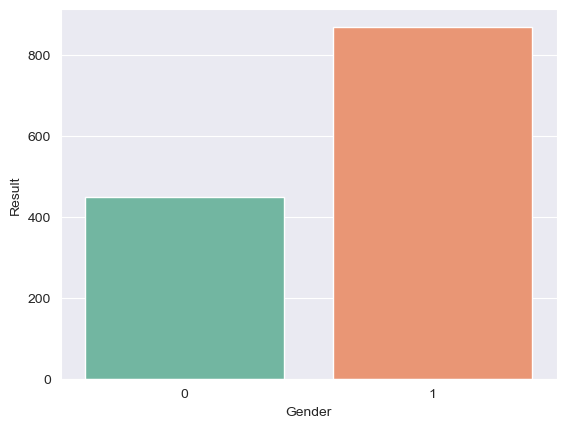

In [312]:
sns.barplot(data=attack_summary_by_gender, x='Gender', y='Result')
plt.show()

In [313]:
x_train, x_test, y_train, y_test = ttsplit(df['Gender'], df['Result'], test_size=0.2, random_state=13)

In [314]:
regr = linear_model.LogisticRegression()

In [315]:
lm = regr.fit(x_train.values.reshape((-1,1)), y_train.values.reshape((-1)))

In [316]:
y_pred = lm.predict(x_test.values.reshape((-1,1)))

In [317]:
residuals = y_test.values-y_pred

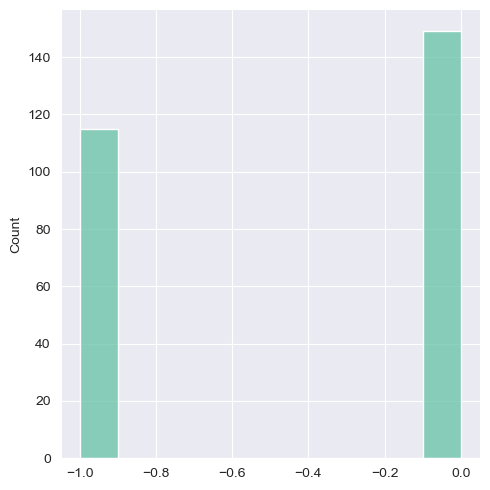

In [318]:
sns.displot(x=residuals)
plt.show()

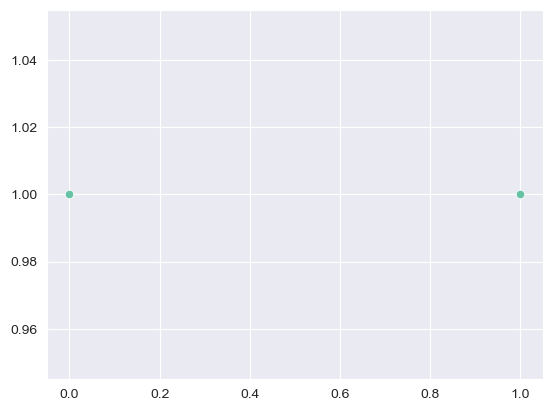

In [319]:
sns.scatterplot(x=y_test.values, y=y_pred)
plt.show()

In [320]:
len(y_pred[y_pred==0])

0

#### Gender alone is also not a significant indicator of heart-attack

In [321]:
_corr = df[['Gender', 'Result']].corr()['Result']['Gender']*100
print(f'Gender to Attack correlation ~= {round(_corr)}%')

Gender to Attack correlation ~= 9%


### Exploring heart-rate

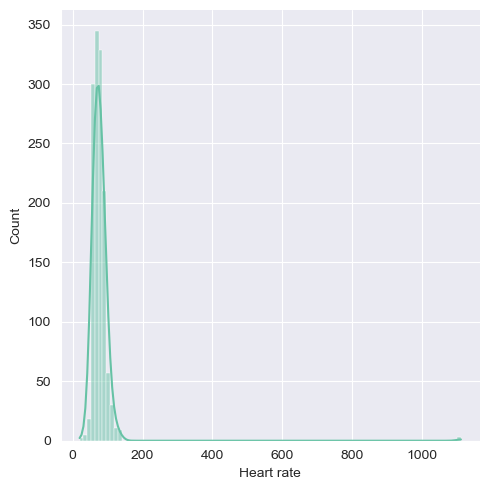

In [322]:
sns.displot(kde=True, x=df['Heart rate'], bins=100)
plt.show()

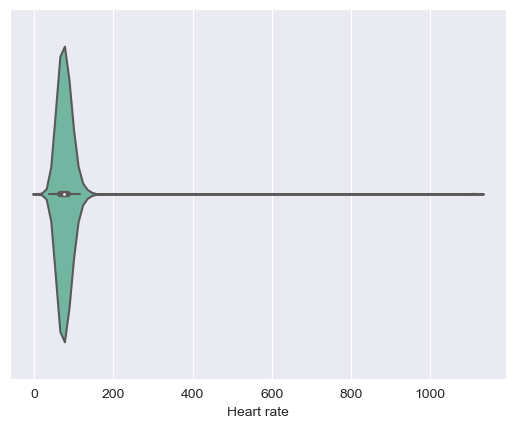

In [323]:
sns.violinplot(data=df, x='Heart rate')
plt.show()

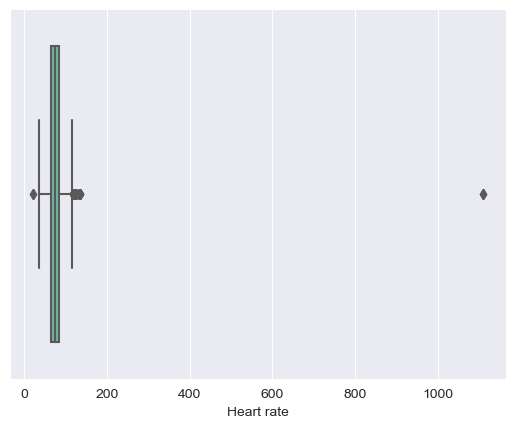

In [324]:
sns.boxplot(data=df, x='Heart rate')
plt.show()

#### There are a lot of outliers here

In [325]:
df['Heart rate'].describe()

count    1319.000000
mean       78.336619
std        51.630270
min        20.000000
25%        64.000000
50%        74.000000
75%        85.000000
max      1111.000000
Name: Heart rate, dtype: float64

In [326]:
stats.trim_mean(df['Heart rate'], 0.1)

74.77388836329234

In [327]:
len(df[df['Heart rate']>100])

82

In [328]:
len(df[df['Heart rate']<50])

10

In [329]:
# let's check the correlation between heart rate and Result
df[['Heart rate', 'Result']].corr()['Heart rate']['Result']

0.006920486214125786

In [330]:
_df = df.query('`Heart rate`>=50 & `Heart rate`<=100')

In [331]:
_df[['Heart rate', 'Result']].corr()['Heart rate']['Result']

-0.008452878539931197

#### Attack has higher correlation to heart rate when the outlier values of `Heart rate` is excluded

In [332]:
x_train, x_test, y_train, y_test = ttsplit(df['Heart rate'], df['Result'], test_size=0.2, random_state=13)

In [333]:
regr = linear_model.LogisticRegression()

In [334]:
lm = regr.fit(x_train.values.reshape((-1,1)), y_train.values.reshape((-1)))

In [335]:
y_pred = lm.predict(x_test.values.reshape((-1,1)))

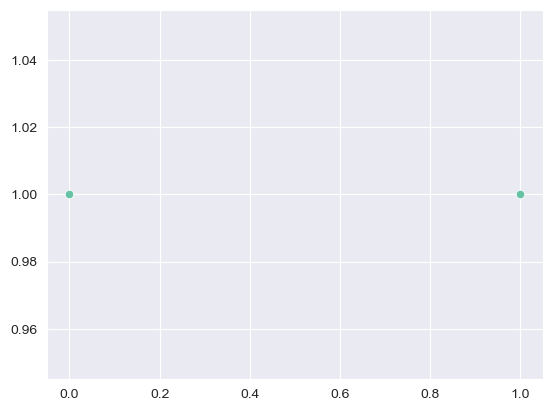

In [336]:
sns.scatterplot(x=y_test.values, y=y_pred)
plt.show()

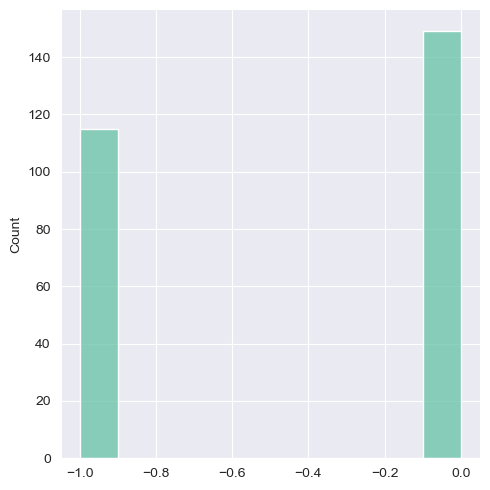

In [337]:
residuals = y_test.values - y_pred
sns.displot(x=residuals)
plt.show()

In [338]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [339]:
df.rename(columns={'Systolic blood pressure':'s_bp', 'Diastolic blood pressure':'d_bp', 'Blood sugar':'sugar'},
          inplace=True)

### Exploring systolic B.P

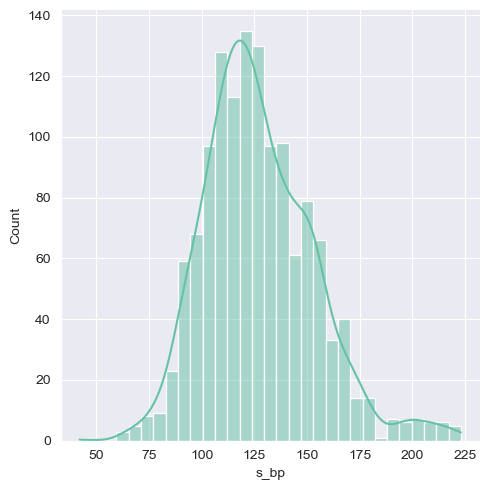

In [340]:
sns.displot(kde=True, x=df['s_bp'])
plt.show()

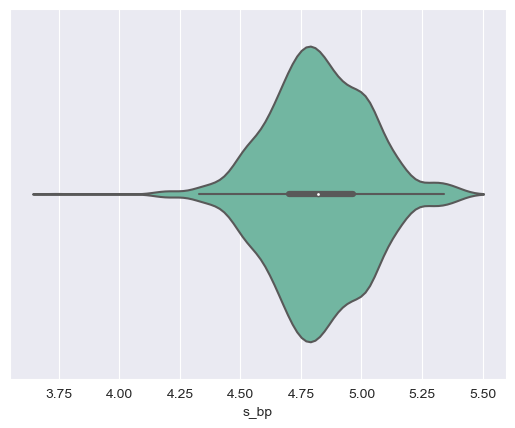

In [341]:
import math
sns.violinplot(x=df['s_bp'].map(math.log))
plt.show()

In [342]:
df[['s_bp', 'Result']].corr()

,s_bp,Result
s_bp,1.000000,-0.020825
Result,-0.020825,1.000000


In [343]:
x_train, x_test, y_train, y_test = ttsplit(df['s_bp'], df['Result'], test_size=0.2, random_state=13)

In [344]:
regr = linear_model.LogisticRegression()

In [345]:
lm = regr.fit(x_train.values.reshape((-1,1)), y_train.values.reshape((-1)))

In [346]:
y_pred = lm.predict(x_test.values.reshape((-1,1)))

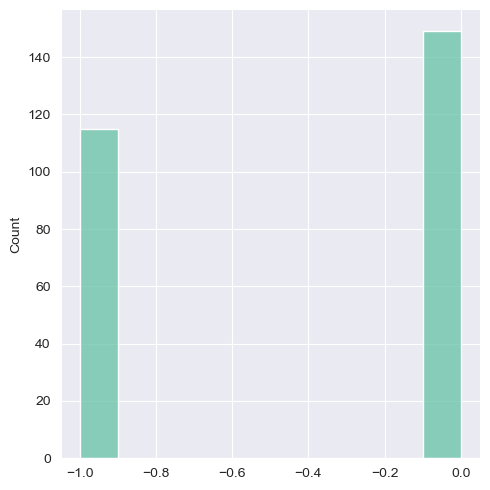

In [347]:
residuals = y_test.values - y_pred
sns.displot(x=residuals)
plt.show()

In [348]:
df.corr().sort_values(by='Result', ascending=False)

,Age,Gender,Heart rate,s_bp,d_bp,sugar,CK-MB,Troponin,Result
Result,0.238097,0.094432,0.006920,-0.020825,-0.009659,-0.033059,0.217720,0.229376,1.000000
Age,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800,0.238097
Troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000,0.229376
CK-MB,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008,0.217720
Gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793,0.094432
Heart rate,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180,0.006920
d_bp,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360,-0.009659
s_bp,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729,-0.020825
sugar,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069,-0.033059


In [349]:
_df = df[['Age', 'Troponin', 'CK-MB','Gender', 'Result']].copy()

In [350]:
_df.rename(columns={'CK-MB':'ckmb'}, inplace=True)

In [351]:
_df['ckmb'].head()

0     1.80
1     6.75
2     1.99
3    13.87
4     1.08
Name: ckmb, dtype: float64

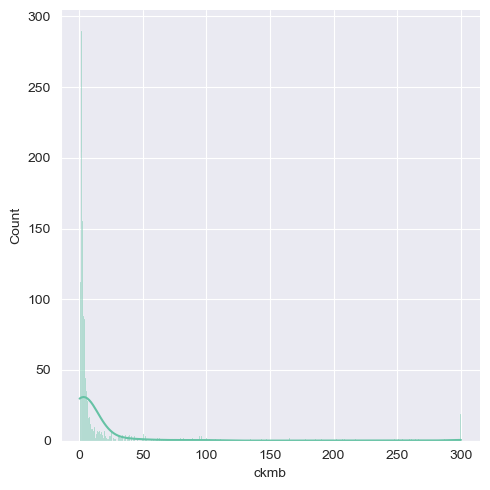

In [352]:
sns.displot(kde=True, x=_df['ckmb'])
plt.show()

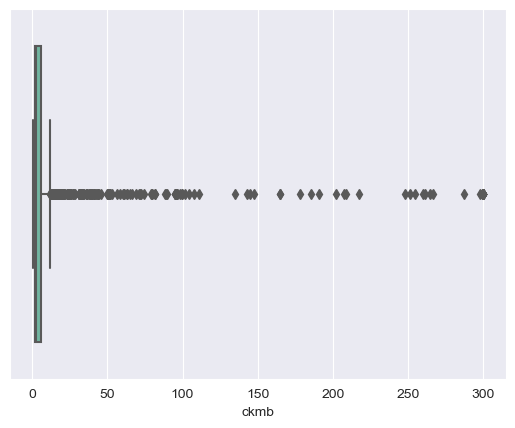

In [353]:
sns.boxplot(x=_df['ckmb'])
plt.show()

In [354]:
_df['ckmb'].describe()

count    1319.000000
mean       15.274306
std        46.327083
min         0.321000
25%         1.655000
50%         2.850000
75%         5.805000
max       300.000000
Name: ckmb, dtype: float64

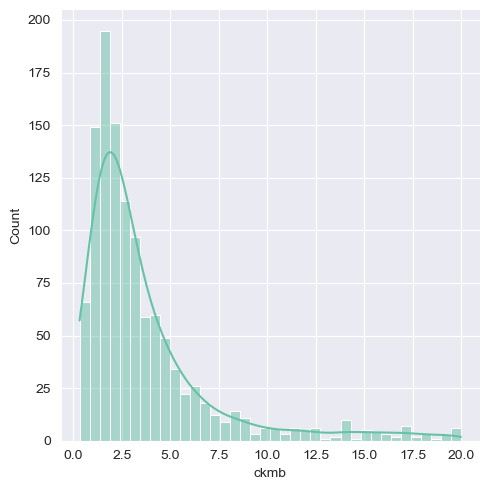

In [355]:
sns.displot(kde=True, x=_df[_df['ckmb']<20]['ckmb'])
plt.show()

In [356]:
_df[_df['ckmb']<20][['ckmb','Result']].corr()

,ckmb,Result
ckmb,1.000000,0.283027
Result,0.283027,1.000000


In [357]:
# _df = _df.query('Age<100 & Age>=20 & ckmb<20')

In [358]:
len(_df)

1168

In [383]:
X=_df.iloc[:,:-1]
Y=_df.iloc[:,-1]
x_train, x_test, y_train, y_test = ttsplit(X,Y, test_size=0.2, random_state=13)

In [384]:
_idx = x_train.query('Age<100 & Age>=20 & ckmb<20').index
y_train = y_train[y_train.index==_idx]
x_train = x_train[x_train.index==_idx]

In [385]:
regr = linear_model.LogisticRegression()

In [386]:
lm = regr.fit(x_train, y_train)

In [387]:
y_pred = lm.predict(x_test)

In [388]:
residues = y_test.values-y_pred

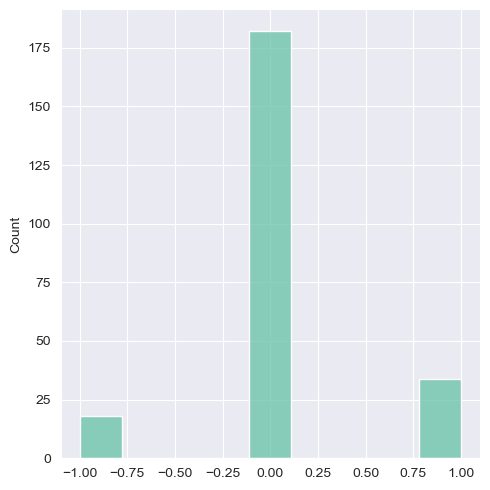

In [389]:
sns.displot(x=residues)
plt.show()

In [391]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 78,  18],
       [ 34, 104]])

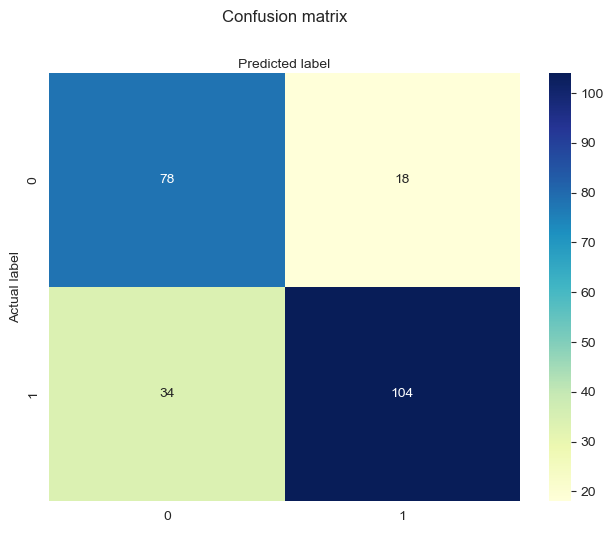

In [394]:
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()